# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.001
0.0
0.0
0.0
0.001
0.0
0.0
0.0
0.0
0.0
-0.001
-0.002
-0.002
-0.002
-0.002
0.0
-0.003
-0.003
-0.003
0.984
0.988
0.987
0.986
0.986
1.977
1.978
1.981
1.981
1.98
2.971
2.975
2.975
2.974
2.973
3.96
3.962
3.964
3.963
3.963
4.952
4.955
4.956
4.956
4.956
5.946
5.948
5.949
5.948
5.949
6.886
6.886
6.886
6.887
7.824
7.824
7.822
7.824
8.814
8.819
8.819
8.817
8.817
9.801
9.805
9.805
9.803
9.803
10.792
10.796
10.796
10.795
10.795
11.784
11.788
11.788
11.787
11.787
12.775
12.779
12.779
12.778
12.778
13.767
13.772
13.772
13.769
13.769
14.759
14.764
14.764
14.762
14.761
15.247
15.248
15.25
15.249
15.732
15.732
15.73
15.73
16.72
16.724
16.724
16.722
16.724
17.712
17.717
17.717
17.717
17.718
18.706
18.71
18.71
18.708
18.709
19.7
19.705
19.705
19.705
19.705
20.691
20.695
20.695
20.694
20.695
21.682
21.686
21.686
21.686
21.686
22.541
22.543
22.544
22.543
22.544
23.407
23.407
23.406
23.406
24.4
24.4
24.398
24.398
25.393
25.393
25.393
25.393
26.388
26.388
26.386


57.984
57.984
57.984
57.984
57.984
57.984
57.984
57.984
57.984
57.984
57.984
57.984
57.984
57.984
57.983
57.982
57.982
57.982
58.266
58.308
58.308
58.308
58.308
58.307
58.31
58.309
58.308
58.308
58.308
58.306
58.306
58.306
58.306
58.306
58.306
58.306
58.305
58.305
58.304
58.304
58.304
58.304
58.304
58.304
58.304
58.303
58.302
58.303
58.303
58.303
58.303
58.303
58.302
58.307
58.307
58.302
58.3
58.302
58.304
58.301
58.3
58.301
58.301
58.414
58.411
58.468
58.572
58.572
58.579
58.589
58.593
58.593
58.593
58.593
58.593
58.593
58.591
58.591
58.59
58.592
58.592
58.594
58.593
58.591
58.592
58.697
58.708
58.708
58.708
58.708
58.709
58.709
58.708
58.707
58.873
58.877
58.877
58.877
58.879
58.879
58.879
58.878
58.878
59.1
59.1
59.111
59.111
59.11
59.111
59.111
59.11
59.11
59.11
59.235
59.247
59.247
59.247
59.247
59.247
59.247
59.246
59.246
59.246
59.383
59.392
59.392
59.392
59.392
59.393
59.393
59.392
59.391
59.393
59.749
59.749
59.754
59.754
59.754
59.754
59.756
59.755
59.754
59.754


KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1341,2682,59.754
1342,2684,59.756
1343,2686,59.755
1344,2688,59.754


<IPython.core.display.Javascript object>


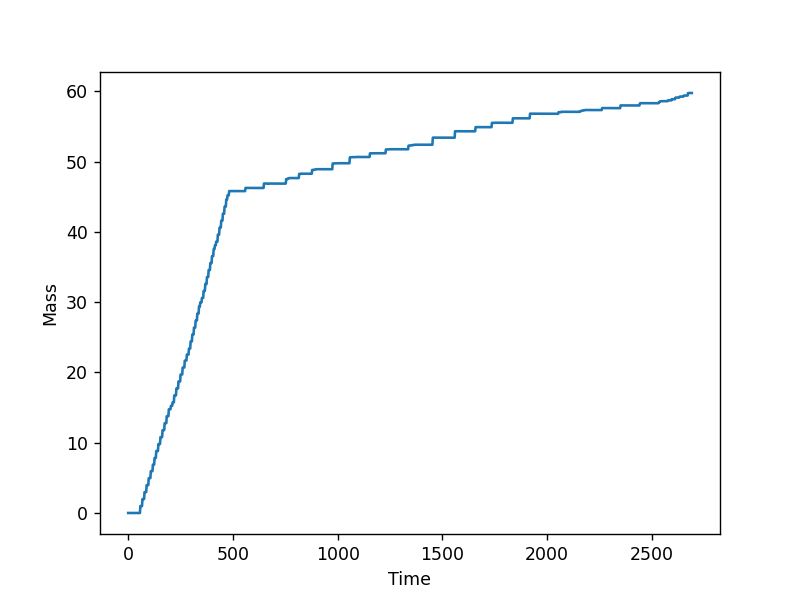

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_220523_S499-504.csv')